# The Plan

- Get some data viz setup
- experiment with kalman filters
- mess with hotelling algos

In [1]:
# imports
%matplotlib inline
!pip install banpei
!pip uninstall numpy --yes
!pip install numpy

import matplotlib
import pandas as pd
import numpy as np
import banpei
import matplotlib.pyplot as plt
print("complete")

You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.
Found existing installation: numpy 1.20.2
Uninstalling numpy-1.20.2:
  Successfully uninstalled numpy-1.20.2
  Using cached numpy-1.20.2-cp38-cp38-macosx_10_9_x86_64.whl (16.0 MB)
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.20.2 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you'll have scipy 1.6.3 which is incompatible.
You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.
complete


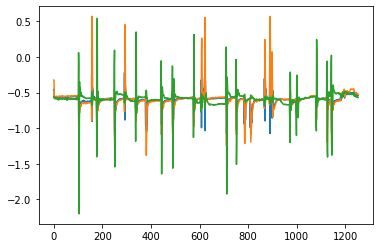

In [20]:
data = pd.read_csv('./data/LST/accelerometer.csv')

# data.plot(x="epoc (ms)", y="x-axis (g)", color="red")
# data.plot(x="epoc (ms)", y="y-axis (g)", color="green")
# data.plot(x="epoc (ms)", y="z-axis (g)")
# plt.figure(figsize=(20,20))
plt.plot([x-1.4 for x in data["y-axis (g)"]])
plt.plot([x+0 for x in data["z-axis (g)"]])
plt.plot([x-0.5 for x in data["x-axis (g)"]])
plt.show()
# print(data["x-axis (g)"])

In [21]:
# print(data["timestamp (-0700)"][102])
# print(data)

In [33]:
x = data["x-axis (g)"] + data["y-axis (g)"] + data["z-axis (g)"]
model   = banpei.Hotelling()
results = model.detect(x, 0.06)

# data.plot(x="epoc (ms)", y="x-axis (g)", color="red")


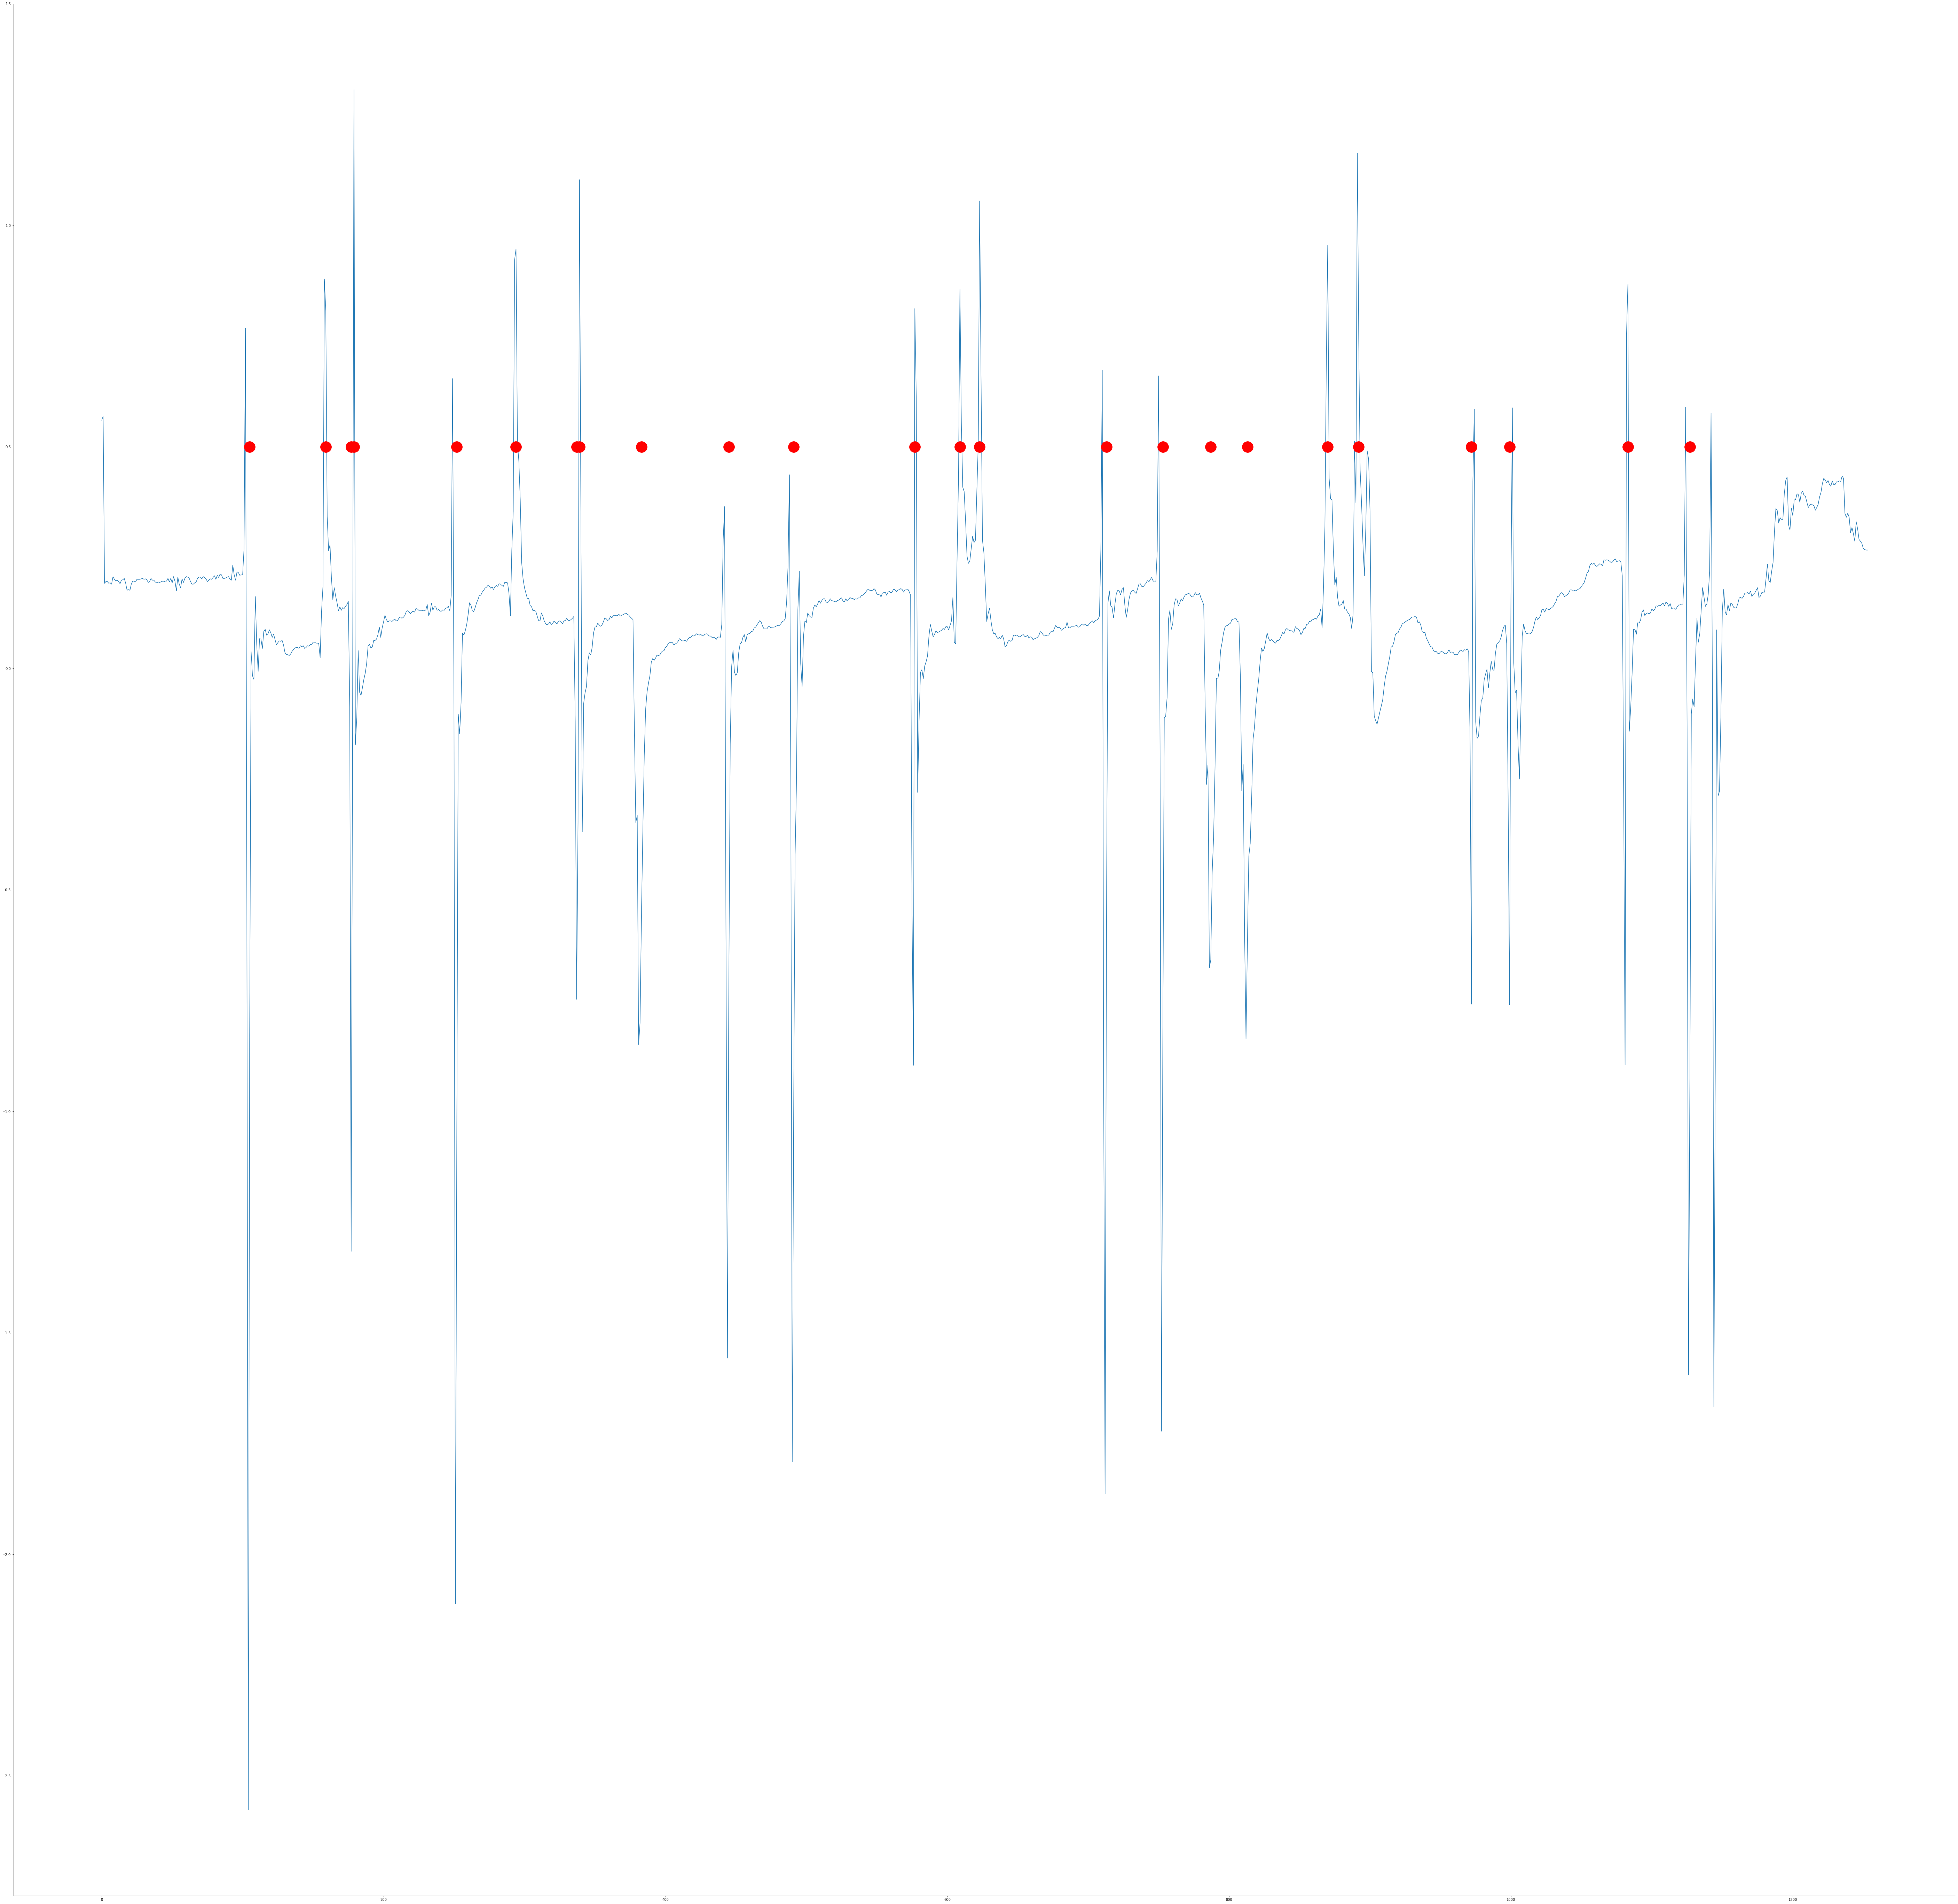

In [34]:
r = [x[0] for x in results]
fr = []
# get rid of detections from the same spike
for i in range(len(r)-1):
    if abs(r[i] - r[i+1]) > 1:
        fr.append(r[i])

plt.figure(figsize=(100,100))
plt.plot(x, zorder=-1)
plt.scatter(fr, [[0.5]*len(fr)], color="red", zorder=2, s=1000)

# plt.show()

In [35]:
ts = '''00:00:04.3
00:00:06.0
00:00:11.8
00:00:15.1
00:00:18.9
00:00:22.2
00:00:27.3
00:00:31.0
00:00:37.9
00:00:40.5
00:00:41.7
00:00:48.8
00:00:52.1
00:00:54.8
00:00:56.9
00:01:01.5
00:01:03.2
00:01:04.0
00:01:09.9
00:01:12.1
00:01:18.7
00:01:22.3
00:01:23.7'''.split("\n")

def c_sec(time_str):
    h, m, s = time_str[:-2].split(':')
    return int(h) * 3600 + int(m) * 60 + int(s) + data["elapsed (s)"][fr[0]]


ts = list(map(c_sec, ts))

# print(list(ts))

a = []
for i in fr:
    a.append(data["elapsed (s)"][i])
# print(a)
print(ts)



[206.444, 208.444, 213.444, 217.444, 220.444, 224.444, 229.444, 233.444, 239.444, 242.444, 243.444, 250.444, 254.444, 256.44399999999996, 258.44399999999996, 263.44399999999996, 265.44399999999996, 266.44399999999996, 271.44399999999996, 274.44399999999996, 280.44399999999996, 284.44399999999996, 285.44399999999996]


24 23


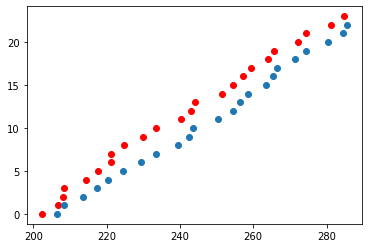

In [36]:
# print(len(ts))
# print(len(r))
print(len(a), len(ts))

plt.scatter(a, range(len(a)), color="red")
plt.scatter(list(ts), range(len(list(ts))))